In [107]:
#@title Install required packages
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
from pathlib import Path

# change this to where you save the data
DATA = Path("/content/drive/My Drive/Genomics Project/Fig 1")

In [110]:
import pandas as pd
meta = pd.read_excel(DATA / "41586_2022_5344_MOESM2_ESM.xlsx",index_col=None,header=1)
meta = meta.reset_index()
meta = meta.rename({'index':'Patient_ID'}, axis=1)
meta

,Patient_ID,genotype,sex,age_at_inf,day,outcome,0,1,2,3,...,6,7,8,9,10,11,12,13,14,age_binary
0,0,APOE2,female,25.285714,13,0,100,98.192771,NaN,83.132530,...,71.887550,71.485944,71.887550,75.903614,75.903614,NaN,NaN,82.730924,NaN,< 30 weeks
1,1,APOE2,female,25.285714,13,0,100,96.721311,NaN,86.229508,...,73.442623,72.459016,74.098361,75.409836,77.049180,NaN,NaN,84.918033,NaN,< 30 weeks
2,2,APOE2,female,25.285714,7,1,100,97.916667,NaN,83.750000,...,71.250000,69.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 30 weeks
3,3,APOE2,female,25.285714,13,0,100,98.437500,NaN,86.718750,...,72.265625,70.312500,71.875000,75.781250,76.953125,NaN,NaN,86.328125,NaN,< 30 weeks
4,4,APOE2,female,25.285714,13,0,100,98.969072,NaN,91.408935,...,91.065292,89.347079,92.096220,93.127148,91.408935,NaN,NaN,92.096220,NaN,< 30 weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,APOE4,male,22.000000,4,0,100,95.846645,92.332268,83.706070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 30 weeks
324,324,APOE4,male,21.571429,4,0,100,97.468354,92.721519,83.860759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 30 weeks
325,325,APOE4,male,21.571429,4,0,100,97.810219,93.430657,84.306569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 30 weeks
326,326,APOE4,male,20.000000,4,0,100,94.551282,91.987179,83.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 30 weeks


In [111]:
#@title Figure 1b

In [112]:
mat = meta[["Patient_ID", "day", "outcome", "age_binary"]]
# mat["event"] = 1 - mat["outcome"]
mat["event"] = mat["outcome"]
mat.drop("outcome", axis=1, inplace=True)
mat.set_index("Patient_ID", inplace=True)
mat

<ipython-input-112-075cb2055659>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat["event"] = mat["outcome"]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day,age_binary,event
Patient_ID,,,
0,13,< 30 weeks,0
1,13,< 30 weeks,0
2,7,< 30 weeks,1
3,13,< 30 weeks,0
4,13,< 30 weeks,0
...,...,...,...
323,4,< 30 weeks,0
324,4,< 30 weeks,0
325,4,< 30 weeks,0


In [113]:
mat["age_binary"].value_counts()

< 30 weeks    282
> 30 weeks     46
Name: age_binary, dtype: int64

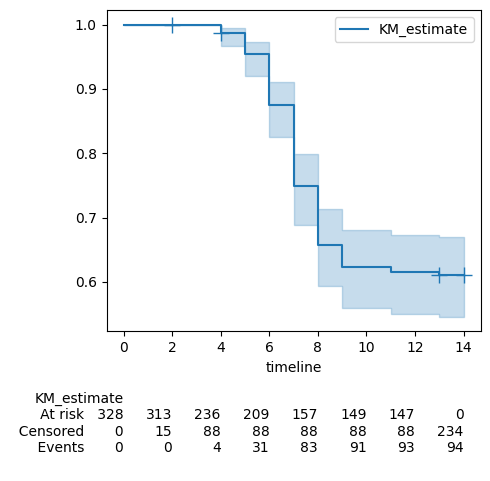

In [114]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()
kmf.fit(durations=mat.day, event_observed=mat.event)

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))
kmf.plot(ax=ax, show_censors=True, at_risk_counts=True)

In [115]:
mat

,day,age_binary,event
Patient_ID,,,
0,13,< 30 weeks,0
1,13,< 30 weeks,0
2,7,< 30 weeks,1
3,13,< 30 weeks,0
4,13,< 30 weeks,0
...,...,...,...
323,4,< 30 weeks,0
324,4,< 30 weeks,0
325,4,< 30 weeks,0


In [116]:
greater = mat[(mat['age_binary'] != '< 30 weeks')]
greater.head()


,day,age_binary,event
Patient_ID,,,
26,5,> 30 weeks,1
27,13,> 30 weeks,0
28,13,> 30 weeks,0
29,13,> 30 weeks,0
30,4,> 30 weeks,1


In [117]:
lesser = mat[(mat['age_binary'] == '< 30 weeks')]
lesser 

,day,age_binary,event
Patient_ID,,,
0,13,< 30 weeks,0
1,13,< 30 weeks,0
2,7,< 30 weeks,1
3,13,< 30 weeks,0
4,13,< 30 weeks,0
...,...,...,...
323,4,< 30 weeks,0
324,4,< 30 weeks,0
325,4,< 30 weeks,0


In [118]:
from lifelines.statistics import logrank_test
lrt = logrank_test(
    durations_A = greater['day'],
    durations_B = lesser['day'],
    event_observed_A = greater['event'],
    event_observed_B = lesser['event'] 
)
p = lrt.p_value
p

0.00012065456952622048

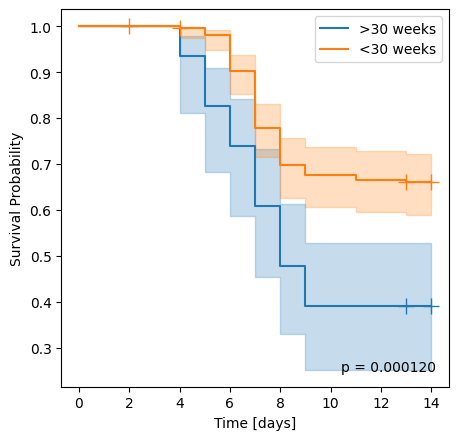

In [119]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

kmf.fit(greater["day"],greater["event"],label=">30 weeks")
kmf.plot(ax=ax, show_censors=True)
kmf2.fit(lesser["day"],lesser["event"],label="<30 weeks")

kmf2.plot(ax=ax, show_censors=True)
ax.set_ylabel("Survival Probability")
ax.set_xlabel("Time [days]")

#add p-value to the plot
ax.add_artist(AnchoredText("p = %f" % round(p,5), loc=4, frameon=False))

In [120]:
#@title Figure 1c

In [121]:
mat2 = meta[["Patient_ID", "day", "outcome", "sex"]]
mat2["event"] = mat2["outcome"]
mat2.drop("outcome", axis=1, inplace=True)
mat2.set_index("Patient_ID", inplace=True)
mat2

<ipython-input-121-a1b256edd409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat2["event"] = mat2["outcome"]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day,sex,event
Patient_ID,,,
0,13,female,0
1,13,female,0
2,7,female,1
3,13,female,0
4,13,female,0
...,...,...,...
323,4,male,0
324,4,male,0
325,4,male,0


In [122]:
mat2.sex.value_counts()

female    167
male      161
Name: sex, dtype: int64

In [123]:
male = mat2[(mat2['sex'] == 'male')]
female = mat2[(mat2['sex'] == 'female')]

In [124]:
from lifelines.statistics import logrank_test
lrt = logrank_test(
    durations_A = male['day'],
    durations_B = female['day'],
    event_observed_A = male['event'],
    event_observed_B = female['event'] 
)
p2=lrt.p_value
p2

2.5969263228716557e-13

Text(0.5, 0, 'Time [days]')

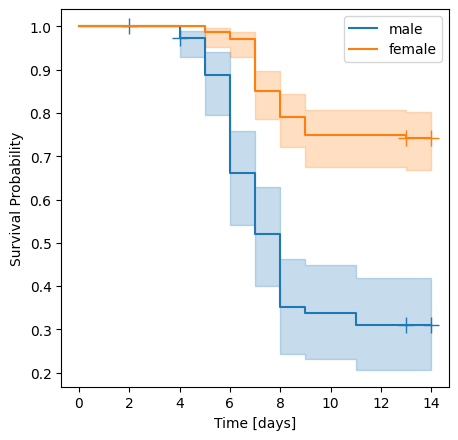

In [125]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

kmf.fit(male["day"],male["event"],label="male")
kmf.plot(ax=ax, show_censors=True)
kmf2.fit(female["day"],female["event"],label="female")

kmf2.plot(ax=ax, show_censors=True)
ax.set_ylabel("Survival Probability")
ax.set_xlabel("Time [days]")
#add p-value to the plot
#ax.add_artist(AnchoredText("p = %f" % p2, loc=4, frameon=False))

In [126]:
#@title Figure 1d

In [127]:
mat3 = meta[["Patient_ID", "day", "outcome", "genotype"]]
mat3["event"] = mat3["outcome"]
mat3.drop("outcome", axis=1, inplace=True)
mat3.set_index("Patient_ID", inplace=True)
mat3

<ipython-input-127-3acbf3fc4534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat3["event"] = mat3["outcome"]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day,genotype,event
Patient_ID,,,
0,13,APOE2,0
1,13,APOE2,0
2,7,APOE2,1
3,13,APOE2,0
4,13,APOE2,0
...,...,...,...
323,4,APOE4,0
324,4,APOE4,0
325,4,APOE4,0


In [128]:
mat3.genotype.value_counts()

APOE2    128
APOE4    118
APOE3     82
Name: genotype, dtype: int64

In [129]:
apoe2 = mat3[(mat3['genotype'] == 'APOE2')]
apoe3 = mat3[(mat3['genotype'] == 'APOE3')]
apoe4 = mat3[(mat3['genotype'] == 'APOE4')]

Text(0.5, 0, 'Time [days]')

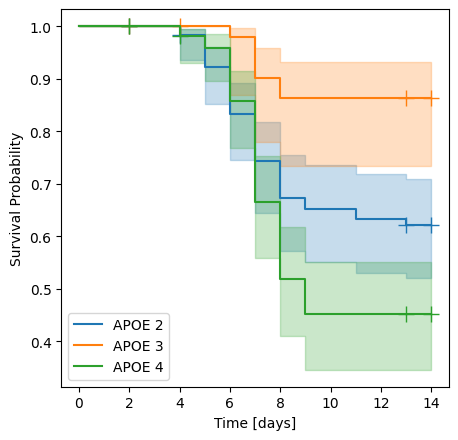

In [130]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

kmf.fit(apoe2["day"],apoe2["event"],label="APOE 2")
kmf.plot(ax=ax, show_censors=True)
kmf2.fit(apoe3["day"],apoe3["event"],label="APOE 3")
kmf2.plot(ax=ax, show_censors=True)
kmf3.fit(apoe4["day"],apoe4["event"],label="APOE 4")
kmf3.plot(ax=ax, show_censors=True)

ax.set_ylabel("Survival Probability")
ax.set_xlabel("Time [days]")

In [131]:
#########################

In [132]:
from lifelines import CoxPHFitter

In [133]:
mat3_new= mat3
mat3_new['genotype'] = mat3_new['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))


<ipython-input-133-6379e4f63040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat3_new['genotype'] = mat3_new['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))


In [134]:
cph = CoxPHFitter()
cph.fit(mat3_new,"genotype",event_col="event")
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
day,-0.10248,0.902597,0.02462,-0.150734,-0.054226,0.860077,0.947218,0.0,-4.162473,0.000031,14.955116


In [ ]:
#ours is p = 0.000031, or 3.1x10-5 vs theirs is 2.5x10-5. 

In [135]:
##############################

In [136]:
#@title Figure 1h
#male vs. different genotype

In [137]:
mat4 = meta[["Patient_ID", "day", "outcome", "genotype", "sex"]]
mat4["event"] = mat4["outcome"]
mat4.drop("outcome", axis=1, inplace=True)
mat4.set_index("Patient_ID", inplace=True)
mat4

<ipython-input-137-ac654012924e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat4["event"] = mat4["outcome"]
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day,genotype,sex,event
Patient_ID,,,,
0,13,APOE2,female,0
1,13,APOE2,female,0
2,7,APOE2,female,1
3,13,APOE2,female,0
4,13,APOE2,female,0
...,...,...,...,...
323,4,APOE4,male,0
324,4,APOE4,male,0
325,4,APOE4,male,0


In [138]:
male2 = mat4[(mat4['sex'] == 'male')]
male2

,day,genotype,sex,event
Patient_ID,,,,
5,6,APOE2,male,1
6,13,APOE2,male,0
7,13,APOE2,male,0
8,8,APOE2,male,1
9,6,APOE2,male,1
...,...,...,...,...
323,4,APOE4,male,0
324,4,APOE4,male,0
325,4,APOE4,male,0


In [139]:
apoe_2 = male2[(male2['genotype'] == 'APOE2')]
apoe_3 = male2[(male2['genotype'] == 'APOE3')]
apoe_4 = male2[(male2['genotype'] == 'APOE4')]

Text(0.5, 0, 'Time [days]')

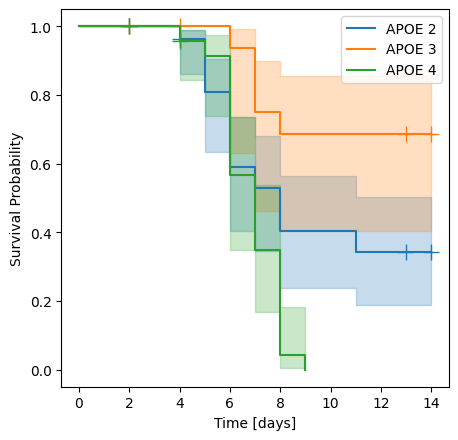

In [140]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

kmf.fit(apoe_2["day"],apoe_2["event"],label="APOE 2")
kmf.plot(ax=ax, show_censors=True)
kmf2.fit(apoe_3["day"],apoe_3["event"],label="APOE 3")
kmf2.plot(ax=ax, show_censors=True)
kmf3.fit(apoe_4["day"],apoe_4["event"],label="APOE 4")
kmf3.plot(ax=ax, show_censors=True)

ax.set_ylabel("Survival Probability")
ax.set_xlabel("Time [days]")

In [148]:
male2_newest = male2
male2_newest.drop('sex', axis=1, inplace=True)
male2_newest

,day,genotype,event
Patient_ID,,,
5,6,2.0,1
6,13,2.0,0
7,13,2.0,0
8,8,2.0,1
9,6,2.0,1
...,...,...,...
323,4,4.0,0
324,4,4.0,0
325,4,4.0,0


In [142]:
male2_newest['genotype'] = male2_newest['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))


<ipython-input-142-2773e6654ddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male2_newest['genotype'] = male2_newest['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))


In [147]:
cph_male = CoxPHFitter()
cph_male.fit(male2_newest,"genotype",event_col="event")
cph_male.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
day,0.149628,1.161402,0.041898,0.067509,0.231746,1.06984,1.2608,0.0,3.571224,0.000355,11.458608


In [ ]:
#ours 0.000355 vs theirs 0.00012 

In [155]:
#@title Figure 1m
#female vs. different genotype

In [149]:
female2 = mat4[(mat4['sex'] == 'female')]
female2

,day,genotype,sex,event
Patient_ID,,,,
0,13,APOE2,female,0
1,13,APOE2,female,0
2,7,APOE2,female,1
3,13,APOE2,female,0
4,13,APOE2,female,0
...,...,...,...,...
285,8,APOE4,female,1
286,14,APOE4,female,0
287,14,APOE4,female,0


In [150]:
apoe_2 = female2[(female2['genotype'] == 'APOE2')]
apoe_3 = female2[(female2['genotype'] == 'APOE3')]
apoe_4 = female2[(female2['genotype'] == 'APOE4')]

Text(0.5, 0, 'Time [days]')

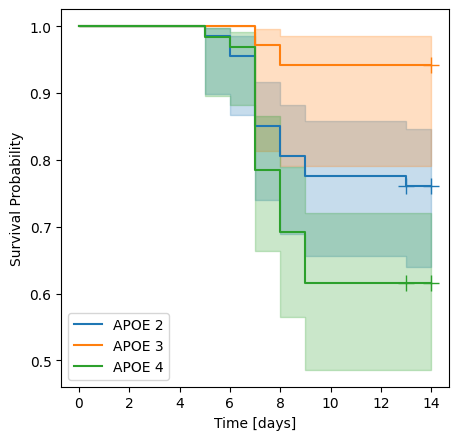

In [151]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

kmf.fit(apoe_2["day"],apoe_2["event"],label="APOE 2")
kmf.plot(ax=ax, show_censors=True)
kmf2.fit(apoe_3["day"],apoe_3["event"],label="APOE 3")
kmf2.plot(ax=ax, show_censors=True)
kmf3.fit(apoe_4["day"],apoe_4["event"],label="APOE 4")
kmf3.plot(ax=ax, show_censors=True)

ax.set_ylabel("Survival Probability")
ax.set_xlabel("Time [days]")

In [152]:
female2_newest = female2
female2_newest.drop('sex', axis=1, inplace=True)
female2_newest

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,day,genotype,event
Patient_ID,,,
0,13,APOE2,0
1,13,APOE2,0
2,7,APOE2,1
3,13,APOE2,0
4,13,APOE2,0
...,...,...,...
285,8,APOE4,1
286,14,APOE4,0
287,14,APOE4,0


In [153]:
female2_newest['genotype'] = female2_newest['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))

<ipython-input-153-c588d08bdaa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female2_newest['genotype'] = female2_newest['genotype'].apply(lambda x: float(x.split()[0].replace('APOE', '')))


In [154]:
cph_female = CoxPHFitter()
cph_female.fit(female2_newest,"genotype",event_col="event")
cph_female.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
day,-0.58068,0.559518,0.071339,-0.720503,-0.440857,0.486508,0.643485,0.0,-8.13968,3.963249e-16,51.164166


In [ ]:
#p-value theirs 0.0021 vs ours 3.963249e-16